In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [3]:
# 독립변인 만들기
factors_plus = np.arange(1,2,0.2)   # 양의 상관관계 : 높이가 클수록 원하는 결과 도출
factors_minus = np.arange(1,2,0.2)  # 음의 상관관계 : 높이가 낮을수록 원하는 결과 도출

factors = []
iteration = 500     # 파라미터 조정 횟수
for _ in range(iteration):
    factors_plus += 0.001   # 회당 파라미터 조정
    factors_minus -= 0.001  # 회당 파라미터 조정

    factor_concat = np.hstack([factors_plus, factors_minus])    # 모든 파라미터 병합
    factors.append(factor_concat)

factors = np.array(factors)
print(factors.shape)

(500, 10)


In [4]:
# 종속변인 만들기
x_start = -2.5
x_end = 2.1

freq = [x for x in np.arange(x_start, x_end, 0.1)]
f = [(2*(x ** 4)) + (x ** 3) + (-8 * (x ** 2)) + 12 for x in np.arange(x_start, x_end, 0.1)]
result_scaled = minmax_scale(f)

observations = []
for alpha in np.arange(0.5, 1, 0.1):
    for _ in range(100):
        error = np.random.rand(len(f)) * alpha
        observation = result_scaled + error
        observations.append(observation)

observations = np.array(observations)
print(observations.shape)


(500, 46)


In [5]:
# 독립변인과 종속변인 병합 (for shuffling)
dataset = np.hstack([factors, observations])
print(dataset.shape)

(500, 56)


In [6]:
# 셔플링 (for 정상적인 학습)
dataset_shuffled = dataset.copy()
np.random.shuffle(dataset_shuffled)

inputs = dataset_shuffled[:, :10]
labels = dataset_shuffled[:, 10:]
print(inputs.shape)
print(labels.shape)


(500, 10)
(500, 46)


In [7]:
# 임계값 만들기
def threshold():
    ty1 = np.arange(0.6, 1.5, 0.1)
    tx1 = np.array([-2] * len(ty1))
    tx2 = np.arange(-2, -1, 0.1)
    ty2 = np.array([0.6] * len(tx2))
    ty3 = ty1.copy()
    tx3 = np.array([-1] * len(ty3))

    ty4 = np.arange(0.8, 1.5, 0.1)
    tx4 = np.array([1] * len(ty4))
    tx5 = np.arange(1, 1.5, 0.1)
    ty5 = np.array([0.8] * len(tx5))
    ty6 = ty4.copy()
    tx6 = np.array([1.5] * len(ty6))

    tx = [np.hstack([tx1, tx2, tx3]), np.hstack([tx4, tx5, tx6])]
    ty = [np.hstack([ty1, ty2, ty3]), np.hstack([ty4, ty5, ty6])]
    return tx, ty

In [9]:
# https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html
# 모델 정의
import torch
from torch import nn

# Numpy의 ndarray를 파이토치의 텐서로 변환
X = torch.tensor(inputs, dtype=torch.float32)
Y = torch.tensor(labels, dtype=torch.float32)

# N은 배치 크기; D_in은 입력의 차원; D_out은 출력 차원
N, D_in, D_out = 64, len(inputs[0]), len(labels[0])

# 모델 정의
model = nn.Sequential(
    nn.Linear(D_in, 100),
    nn.ReLU(),
    nn.Linear(100, 32),
    nn.ReLU(),
    nn.Linear(32, D_out)
)

# 손실함수 정의
loss_fn = torch.nn.MSELoss(reduction='sum')

# optim 패키지를 사용하여 모델의 가중치를 갱신할 Optimizer를 정의합니다.
# 여기서는 Adam을 사용하겠습니다; optim 패키지는 다른 다양한 최적화 알고리즘을
# 포함하고 있습니다. Adam 생성자의 첫번째 인자는 어떤 Tensor가 갱신되어야 하는지
# 알려줍니다.
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
# 모델 학습
num_epochs = 200
losses = []
for epoch in range(num_epochs):
    # 순전파 단계: 모델에 x를 전달하여 예상되는 y 값을 계산합니다.
    y_pred = model(X)

    # 손실을 계산하고 출력합니다.
    loss = loss_fn(y_pred, Y)
    if epoch % 10 == 0:
        print(epoch, loss.item())

    losses.append(loss.item())
    # 역전파 단계 전에, Optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인)
    # 갱신할 변수들에 대한 모든 변화도를 0으로 만듭니다. 이렇게 하는 이유는
    # 기본적으로 .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고)
    # 누적되기 때문입니다. 더 자세한 내용은 torch.autograd.backward에 대한 문서를
    # 참조하세요.
    optimizer.zero_grad()

    # 역전파 단계: 모델의 매개변수에 대한 손실의 변화도를 계산합니다.
    loss.backward()

    # Optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.
    optimizer.step()


0 14983.5244140625
10 11263.662109375
20 7948.8447265625
30 4663.10546875
40 2518.38671875
50 1509.855224609375
60 1161.6456298828125
70 1077.6134033203125
80 1056.3402099609375
90 1042.1978759765625
100 1031.443359375
110 1023.5775146484375
120 1017.6360473632812
130 1013.0045166015625
140 1009.3265991210938
150 1006.4345703125
160 1004.2107543945312
170 1002.506591796875
180 1001.1958618164062
190 1000.166259765625


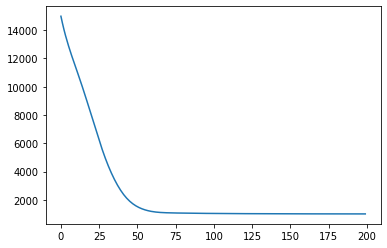

In [11]:
# loss 그래프
plt.plot(losses)

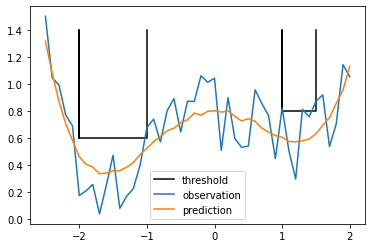

In [12]:
# 예측
tx, ty = threshold()
for i, x, y in zip(range(2), tx, ty):
    if i == 0:
        plt.plot(x, y, color = 'black', label='threshold')
    else:
        plt.plot(x, y, color='black')

model.eval()
pred = model(X[0]).detach().numpy()
plt.plot(freq, labels[0], label='observation')
plt.plot(freq, pred, label='prediction')
plt.legend()